# Random Imputation

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
from sklearn.model_selection import train_test_split

## Numerical Data

In [126]:
df=pd.read_csv('csv/train.csv',usecols=['Age','Survived','Fare'])

In [127]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [128]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [130]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [131]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

C:\Users\moury\AppData\Local\Temp\ipykernel_28488\2031519514.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
C:\

In [132]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([19.  , 29.  ,  4.  , 21.  , 22.  , 16.  , 62.  , 18.  , 30.  ,
       40.5 , 38.  , 36.  , 20.  , 18.  , 25.  , 29.  , 44.  , 27.  ,
       20.  , 17.  , 16.  , 19.  , 34.  , 26.  , 20.  , 24.  , 20.  ,
       35.  , 14.5 , 27.  , 28.  , 25.  , 19.  , 61.  , 22.  , 19.  ,
       16.  , 28.  , 32.  ,  6.  , 39.  ,  4.  , 45.  , 39.  , 51.  ,
       29.  , 47.  , 37.  , 47.  , 25.  , 30.  , 17.  , 28.  , 30.  ,
       31.  ,  7.  ,  3.  , 28.  , 51.  , 32.  ,  4.  , 30.  , 34.  ,
       32.  ,  1.  , 16.  ,  9.  , 36.  , 43.  , 30.  ,  0.42,  0.92,
       60.  , 30.  , 17.  , 35.  , 24.  , 29.  , 37.  ,  5.  , 35.  ,
       26.  , 45.  , 34.  , 52.  , 33.  , 23.  , 33.  , 27.  , 40.  ,
       45.  , 25.  , 51.  ,  1.  , 18.  , 42.  , 25.  , 56.  , 19.  ,
       22.  , 32.  , 15.  , 19.  , 43.  , 17.  , 40.5 , 28.  , 33.  ,
       24.  , 14.  , 36.  , 22.  , 50.  ,  9.  , 20.  , 24.  , 26.  ,
       32.  , 18.  , 54.  , 25.  , 14.  , 58.  , 21.  , 39.  , 24.  ,
       25.  , 18.  ,

In [133]:
x_train.isnull().sum()

Age            140
Fare             0
Age_imputed      0
dtype: int64

C:\Users\moury\AppData\Local\Temp\ipykernel_28488\781893039.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=x_train['Age'],label='original',hist=False)
C:\Users\moury\AppData\Local\Temp\ipykernel_28488\781893039.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=x_trai

<Axes: ylabel='Density'>

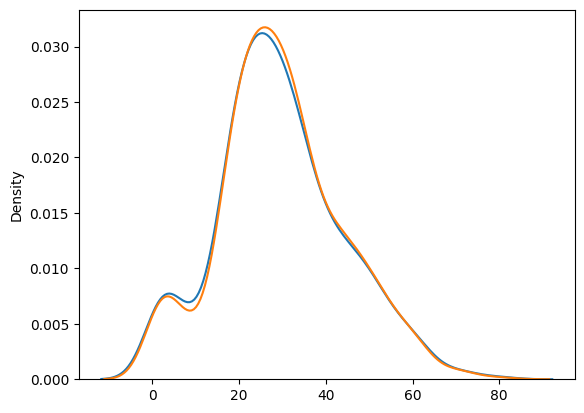

In [134]:
sns.distplot(x=x_train['Age'],label='original',hist=False)
sns.distplot(x=x_train['Age_imputed'],label='original',hist=False)

In [135]:
x_train['Age'].var(),x_train['Age_imputed'].var()

(np.float64(210.2517072477435), np.float64(203.94448543671677))

In [136]:
x_train.cov()

,Age,Fare,Age_imputed
Age,210.251707,71.580633,210.251707
Fare,71.580633,2700.831981,52.440691
Age_imputed,210.251707,52.440691,203.944485


<Axes: >

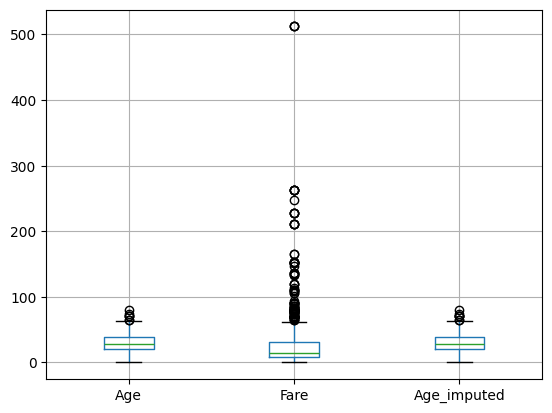

In [137]:
x_train.boxplot()

In [146]:
# sampled_value=x_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

In [152]:
data=pd.read_csv('csv/house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [153]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [154]:
x=data.drop(columns=['SalePrice'])
y=data['SalePrice']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [156]:
x_train['GarageQual_imputed']=x_train['GarageQual']
x_train['FireplaceQu_imputed']=x_train['FireplaceQu']
x_test['GarageQual_imputed']=x_test['GarageQual']
x_test['FireplaceQu_imputed']=x_test['FireplaceQu']

In [161]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

C:\Users\moury\AppData\Local\Temp\ipykernel_28488\4277669966.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual']

In [ ]:
temp=pd.concat([
    x_train['GarageQual'].value_counts()/len(x_train['GarageQual'].dropna()),
    x_train['GarageQual_imputed'].value_counts()/len(x_train)
],axis=1)
temp.columns=['Original','Imputed']
temp
# same for fireq

,Original,Imputed
TA,0.951087,0.949486
Fa,0.032609,0.033390
Gd,0.011775,0.011986
Ex,0.002717,0.003425
Po,0.001812,0.001712


In [ ]:
for cat in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu']==cat]['SalePrice'],hist=False)
plt.show()
#same for fire

KeyError: 'SalePrice'